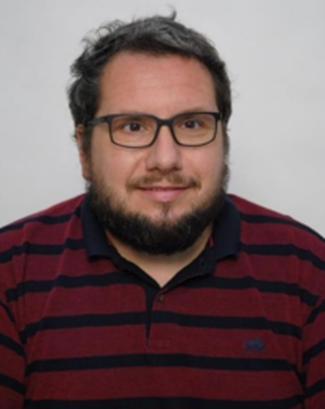 <h2>Jindrich Fiala</h2>
<ul>
  <li>Python programmer in R&D</li>
  <li>Developing sensors</li>
  <li>Expected to lead AI projects</li>
</ul>

# RECOGNITION OF HANDWRITTEN LETTERS USING MACHINE LEARNING

## General information about the code

The code is not divided into classes and methods so that we can follow how it works line by line.

## Importing Libraries

<P>An advantage of Python is the large number of libraries that can be called with Python. These are highly optimized codes written in languages like C++. Therefore, they are very fast and reduce the amount of code that needs to be written.</p>
<p>In the following code, we will use the following libraries:</p>
<ul>
    <li>Numpy
    <li>Matplotlib
    <li>Keras
    <li>Scikit-learn
</ul>

<H3>Numpy</H3>
<p>NumPy is a fundamental library for scientific computing in Python, providing support for large, multidimensional arrays and matrices along with mathematical functions to operate on these arrays efficiently.</p>
<p>In this project, in addition to data manipulation, we will also use this library for generating random numbers.</p>

<H3>Matplotlib</H3>
<p>Matplotlib is a popular plotting library in Python, primarily used for creating static, animated, and interactive visualizations.</p>
<p>But in this program, we will use it for displaying images.</p>

<H3>Keras</H3>
<p>Keras is a high-level neural network library. It provides an easy-to-use interface for building and training deep learning models.</p>
<p>Here, we use various Keras modules to load datasets, preprocess data, build a neural network, and train and evaluate the model.</p>
</ul>

<H3>Scikit-learn</H3>
<p>Scikit-learn open-source machine learning library for the Python programming language. It includes a wide range of algorithms for classification, regression, and clustering etc.</p>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from sklearn.metrics import classification_report

## Loading data

<p>This is a function from the Keras library, specifically from the keras.datasets module. It loads the MNIST dataset, which contains images of handwritten digits (0-9). When you call mnist.load_data(), it returns a tuple containing two tuples:</p>
<ul>
    <li>The first tuple contains the training data (x_train and y_train).
    <li>The second tuple contains the testing data (x_test and y_test).
</ul>

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(f"Size of x_train_set {x_train.shape[0]} elements.   Size of x_test_set: {x_test.shape[0]} elements.")

Size of x_train_set 60000 elements.   Size of x_test_set: 10000 elements.


## Splitting the Dataset

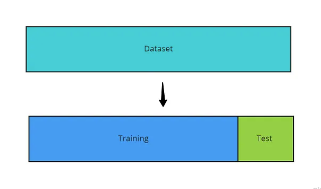
<H3>Test Split Evaluation Approach</H3>
<P>The idea behind this approach is to split the available dataset into two distinct subsets:</P>
<ul>
    <li>training dataset
    <li>testing datasets
</ul>

<p>The split is typically done randomly, but it is often done with a fixed proportion, such as 70% for training and 30% for testing, or 80% for training and 20% for testing. The goal is to use the training data to learn and then evaluate how well the model performs on the test data. If the model performs well on the testing set, it suggests that the model has generalized well and can be expected to perform well on new data.</p>

<p><b>Advantages:</b></p>
<ul>
    <li>It’s easy to implement and understand. 
    <li>It provides a quick way to get an estimate of how the model will perform in real-world applications.</p>
</ul>
<p>We chose the Test Split Evaluation Approach for simplicity.</p>

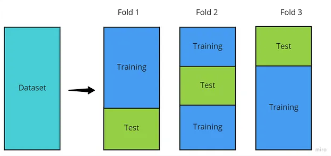

<h3>K-Fold Cross Validation</h3>
<p>K-fold cross-validation is a more robust approach to evaluating a model’s performance by splitting the dataset into multiple subsets or "folds." In this method, the dataset is divided into <strong>k</strong> equally sized folds (subsets). The model is trained <strong>k</strong> times, each time using <strong>k-1</strong> folds for training and the remaining fold for testing.</p>

<ol>
  <li><strong>Split the Data:</strong> The dataset is randomly split into <strong>k</strong> subsets (or folds).</li>
  <li><strong>Training and Evaluation:</strong>
    <ul>
      <li>For each fold, the model is trained on the <strong>k-1</strong> folds and tested on the remaining fold.</li>
      <li>This process repeats for each of the <strong>k</strong> folds, with each fold serving as the test set once.</li>
    </ul>
  </li>
  <li><strong>Average the Results:</strong> After the model has been trained and evaluated <strong>k</strong> times, the final performance metric (such as accuracy, F1-score, etc.) is computed by averaging the results from each fold.</li>
</ol>

<p><b>Advantages:</b></p>
<ul>
  <li>More Reliable Estimate since the model is tested multiple times, using different subsets of the data, the results are more reliable and provide a better estimate of how the model will generalize to unseen data.</li>
  <li>Better Use of Data. Every data point is used for both training and testing, which helps ensure that the model is evaluated on all the data.</li>
</ul>

<p><b>Disadvantages:</b></p>
<ul>
  <li>Computationally Expensive. Since the model is trained <i>k</i> times, it can be more computationally intensive, especially for large datasets and complex models.</li>
  <li>Longer Training Time: Each model must be trained <i>k</i> times, which may lead to longer training times.</li>
</ul>

## Converting the Data

### Normalizing Gray Scale Values

The gray scale of each pixel in the image is encoded with 8 bits. The maximum value of a single pixel is 255, which is easy to verify.

In [21]:
print(f"Max value of x_train: {x_train.max()}. Max value of x_test: {x_test.max()}")

Max value of x_train: 255. Max value of x_test: 255


For easier model training, it is common practice to normalize the values of each pixel to a range between zero and one.

In [22]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [23]:
print(f"Max value of x_train: {x_train.max()}. Max value of x_test: {x_test.max()}")

Max value of x_train: 1.0. Max value of x_test: 1.0


### One Hot Encoding

<p>In classification tasks, models often output probabilities for each class instead of just a single label. For a model to learn effectively, the labels are typically represented in a "one-hot encoded" format rather than as simple integers.</p>

<p>One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.</p>

<p>
Examples:<BR>
A label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].<BR>
A label 7 becomes [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].
</p>

In [24]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [25]:
print(y_cat_test, end='\n\n')
print(f"{y_cat_test.shape[0]} test values, of {y_cat_test.shape[1]} cathegories.")

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

10000 test values, of 10 cathegories.


## Model

<h4>Input Layer</h4>
<B>Input(shape=(28, 28, 1))</B><br>
Defines the shape of the input data for the model. Here, each input image is 28x28 pixels with 1 channel (grayscale). This layer prepares data for processing by subsequent layers.

<h4>Convolutional Layer 1</h4>
<B>Conv2D(filters=32, kernel_size=(4,4), activation='relu')</B><br>
Applies 32 convolutional filters of size 4x4. Each filter slides over the input image to extract local features like edges and textures. The <B>ReLU</B> activation function replaces negative values with zero, allowing the network to learn non-linear patterns.

<h4>Pooling Layer 1</h4>
<B>MaxPool2D(pool_size=(2, 2))</B><br>
Reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 block. This down-sampling process reduces complexity and helps prevent overfitting.

<h4>Convolutional Layer 2</h4>
<B>Conv2D(filters=32, kernel_size=(4,4), activation='relu')</B><br>
Applies another set of 32 filters (4x4) to detect more complex features. Stacking layers allows the model to recognize progressively abstract patterns. <B>ReLU</B> is used to introduce non-linearity.

<h4>Pooling Layer 2</h4>
<B>MaxPool2D(pool_size=(2, 2))</B><br>
Further reduces spatial dimensions, focusing on significant features from the second convolutional layer.

<h4>Flatten Layer</h4>
<B>Flatten()</B><br>
Converts the 2D feature maps into a 1D vector, preparing it for the fully connected (dense) layers.

<h4>Dense Layer (Hidden Layer)</h4>
<B>Dense(256, activation='relu')</B><br>
A fully connected layer with 256 neurons that learns complex patterns across all features generated by previous layers. The <B>ReLU</B> activation enables learning of complex, non-linear mappings.

<h4>Dense Layer (Output Layer)</h4>
<B>Dense(10, activation='softmax')</B><br>
The output layer, with 10 neurons (one for each class). <B>Softmax</B> converts outputs into probabilities, each representing the likelihood of the input image belonging to a particular digit (0-9).

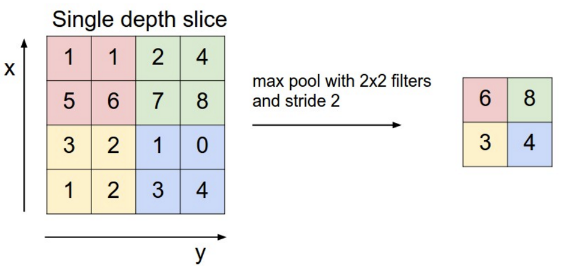
MaxPool2D

## Activation Funcions

### Sigmoid vs ReLu

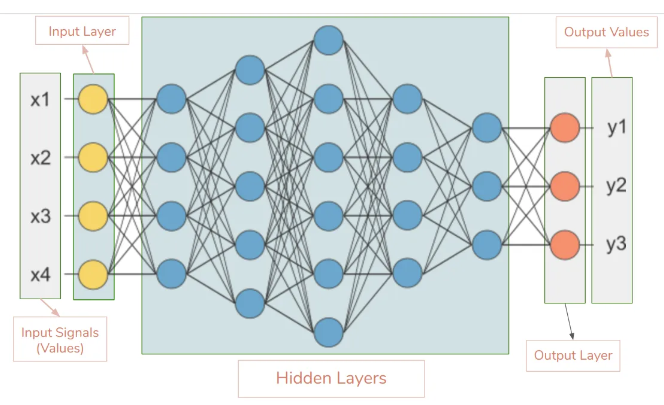<BR>
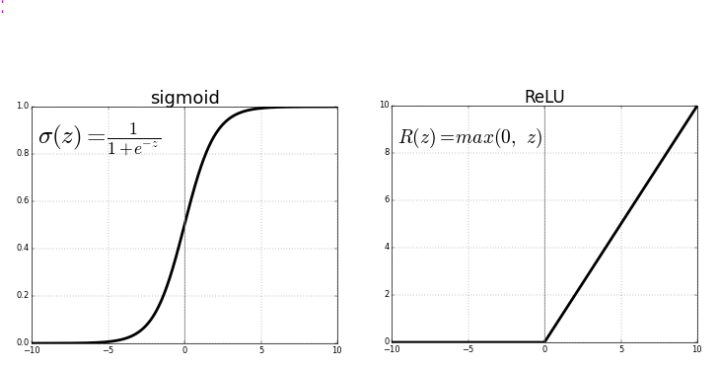<BR>
<p>As an activation function, ReLU is typically used in hidden layers instead of Sigmoid. The Sigmoid function has a small slope for large and small values of <I>z</I>, which slows down learning and can lead to poorer learning outcomes. It takes time to descend to the minimum of the loss function.</p>

<p>The Softmax I use in the output layer of a neural networky for multiclass classification problems. It converts the raw output scores (logits) from the final layer of the network into probabilities, 0 and 1.<p>
<p>For a given vector of raw outputs (logits) <i>z = [z<sub>1</sub>, z<sub>2</sub>, ..., z<sub>n</sub>]</i>, the softmax function transforms these logits into probabilities <strong>p<sub>i</sub></strong> as follows:</p>

<p><strong>p<sub>i</sub> = &frac12;<sup>e<sup>z<sub>i</sub></sup></sup> / &sum;<sub>j=1</sub><sup>n</sup> e<sup>z<sub>j</sub></sup></strong></p>

<p>Where:</p>
<ul>
  <li><strong>e<sup>z<sub>i</sub></sup></strong> is the exponential of the input value <strong>z<sub>i</sub></strong>.</li>
  <li>The denominator is the sum of the exponentials of all logits, ensuring that the output probabilities sum to 1.</li>
</ul>



In [30]:
# Define the CNN model for MNIST
model = Sequential()
# Input layer with the input shape
model.add(Input(shape=(28, 28, 1)))
# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
# First Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Second Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Flatten layer (converts 2D feature maps to a 1D vector)
model.add(Flatten())
# Dense hidden layer
model.add(Dense(256, activation='relu'))
# Output layer (classifier)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,858 (589.29 KB)

 Trainable params: 150,858 (589.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [27]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9116 - loss: 0.2796
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0314
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0145
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9966 - loss: 0.0115
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9971 - loss: 0.0106
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0085
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9983 - loss: 0.0066


## Evalute the Model

In [28]:
# Evaluate the model
model.evaluate(x_test, y_cat_test)

# Predict the labels for test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Display classification report
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0605
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



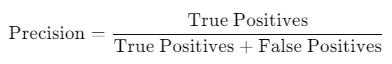!<BR>[image-2.png](attachment:image-2.png)<BR> 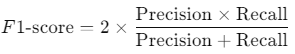<BR>
<p>A precision of 1 means that every time the model predicts a positive class, it is correct. There are no false positives.</p>
<p>A recall of 1 means that the model is correctly identifying every actual instance of the positive class. There are no false negatives (it doesn’t miss any of the positive instances).</p>

## Test the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


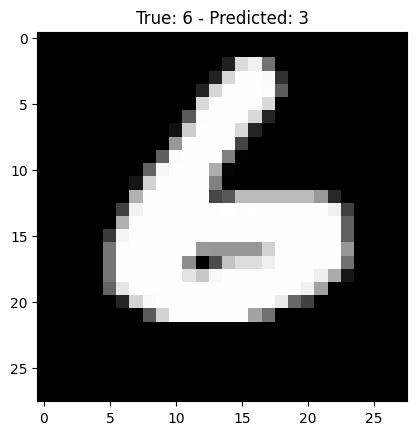

In [40]:
# Select a random image from the training set for visualization
random_index = np.random.randint(0, len(x_train))

# Get the image and its corresponding label
image = x_train[random_index].reshape(28, 28)  # Reshape for display as grayscale
true_label = y_train[random_index]  # Get true label

# Predict the category for the image
predicted_label = model.predict(np.expand_dims(x_train[random_index], axis=0))
predicted_category = np.argmax(predicted_label, axis=1)[0]

# Display the image and prediction
plt.imshow(image, cmap='gray')
plt.title(f"True: {true_label} - Predicted: {predicted_category}")
plt.show()